In [698]:
import pandas as pd
import os
import seaborn as sns
from scipy.stats import wilcoxon
from scipy.stats import ranksums
import matplotlib.pyplot as plt

In [699]:
def printWilcoxonTestResults(df, measure):
    # Group the data by Generator
    generators = df['Generator'].unique()
    results = {}

    # Perform pairwise Wilcoxon signed-rank tests
    for i in range(len(generators)):
        for j in range(i + 1, len(generators)):
            gen1 = generators[i]
            gen2 = generators[j]
            time_gen1 = df[df['Generator'] == gen1][measure]
            time_gen2 = df[df['Generator'] == gen2][measure]
            
            # Perform the Wilcoxon signed-rank test
            stat, p = ranksums(time_gen1, time_gen2)
            results[f'{gen1} vs {gen2}'] = p

    # Print the results
    for comparison, p_value in results.items():
        print(f'{comparison}: p-value = {p_value}')

    # Compute the average measure for each generator
    avg_measure = df.groupby('Generator')[measure].mean()
    print("\nAverage " + measure)
    print(avg_measure)

    avg_measure = df.groupby('Generator')[measure].median()
    print("\nMedian " + measure)
    print(avg_measure)

    avg_measure = df.groupby('Generator')[measure].std()
    print("\nStdDev " + measure)
    print(avg_measure)


In [700]:
def printWilcoxonTestResultsByMutation(df, measure):
    # Group the data by Mutation
    mutations = df['Mutation'].unique()
    mutation_results = {}

    # Perform pairwise Wilcoxon signed-rank tests for each mutation
    for mutation in mutations:
        mutation_data = df[df['Mutation'] == mutation]
        generators = mutation_data['Generator'].unique()
        results = {}
        
        for i in range(len(generators)):
            for j in range(i + 1, len(generators)):
                gen1 = generators[i]
                gen2 = generators[j]
                time_gen1 = mutation_data[mutation_data['Generator'] == gen1][measure]
                time_gen2 = mutation_data[mutation_data['Generator'] == gen2][measure]
                
                # Perform the Wilcoxon signed-rank test
                stat, p = ranksums(time_gen1, time_gen2)
                results[f'{gen1} vs {gen2}'] = p
        
        mutation_results[mutation] = results

    # Print the results
    for mutation, results in mutation_results.items():
        print(f'Mutation: {mutation}')
        for comparison, p_value in results.items():
            print(f'  {comparison}: p-value = {p_value}')
        print()

    # Compute the average measure for each generator
    avg_measure = df.groupby(['Generator', 'Mutation'])[measure].mean()
    print("Average " + measure)
    print(avg_measure)

In [701]:
# Load in a Pandas dataframe the JSSExperiments.txt file
df = pd.read_csv('JSSExperiments.txt', sep=',', header=0)

# Exclude all lines with ORIGINAL as Generator
df = df[df['Generator'] != 'ORIGINAL']

# Count the elements
print(df['Generator'].value_counts())

# Count the elements where RepCount is 1
print(df[df['RepCount'] == 1]['Generator'].value_counts())

GFS        32558
SPECGEN    32558
GFE        32558
Name: Generator, dtype: int64
SPECGEN    3264
GFE        3264
GFS        3264
Name: Generator, dtype: int64


## Time

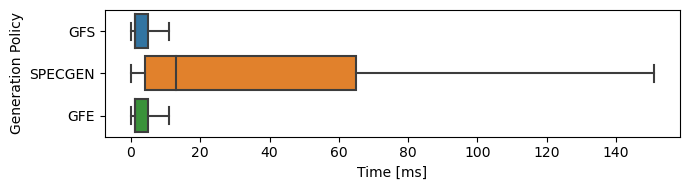

In [702]:
plt.figure(figsize=(7, 2))
sns.boxplot(x='Time', y='Generator', data=df, showfliers=False)
plt.ylabel('Generation Policy')
plt.xlabel('Time [ms]')
plt.tight_layout()
plt.savefig('Time.pdf')
plt.show()

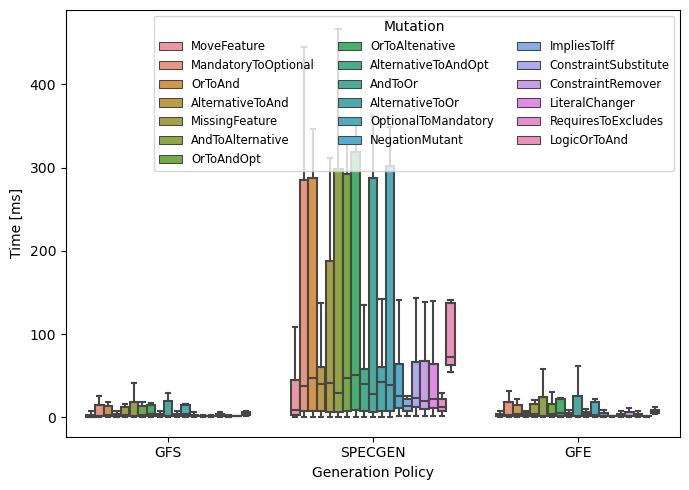

In [703]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Generator', y='Time', hue='Mutation', data=df, showfliers=False)
plt.xlabel('Generation Policy')
plt.ylabel('Time [ms]')
plt.legend(title='Mutation', loc='upper right', ncol=3, fontsize='small')
plt.tight_layout()
plt.savefig('TimePerMutation.pdf')
plt.show()

In [704]:
printWilcoxonTestResults(df, 'Time')

GFS vs SPECGEN: p-value = 0.0
GFS vs GFE: p-value = 4.076088113380578e-47
SPECGEN vs GFE: p-value = 0.0

Average Time
Generator
GFE        231.292401
GFS        144.512439
SPECGEN    262.319123
Name: Time, dtype: float64

Median Time
Generator
GFE         1.0
GFS         1.0
SPECGEN    13.0
Name: Time, dtype: float64

StdDev Time
Generator
GFE        5561.728828
GFS         918.636399
SPECGEN    8503.751618
Name: Time, dtype: float64


In [705]:
printWilcoxonTestResultsByMutation(df, 'Time')

Mutation: MoveFeature
  GFS vs GFE: p-value = 2.3900795766568768e-32
  GFS vs SPECGEN: p-value = 0.0
  GFE vs SPECGEN: p-value = 0.0

Mutation: MandatoryToOptional
  SPECGEN vs GFE: p-value = 8.471775163837688e-189
  SPECGEN vs GFS: p-value = 6.361230878976933e-225
  GFE vs GFS: p-value = 5.290123402653923e-06

Mutation: OrToAnd
  GFE vs SPECGEN: p-value = 1.5715083999010093e-34
  GFE vs GFS: p-value = 0.17960009662024656
  SPECGEN vs GFS: p-value = 5.5419212203644855e-39

Mutation: AlternativeToAnd
  GFS vs SPECGEN: p-value = 8.196694425581964e-63
  GFS vs GFE: p-value = 0.004354611374854938
  SPECGEN vs GFE: p-value = 6.232967988085737e-57

Mutation: MissingFeature
  SPECGEN vs GFE: p-value = 1.9817652966142555e-186
  SPECGEN vs GFS: p-value = 2.0057338852678918e-195
  GFE vs GFS: p-value = 0.03733229416127654

Mutation: AndToAlternative
  GFE vs SPECGEN: p-value = 3.929629666243282e-105
  GFE vs GFS: p-value = 2.443350194153031e-05
  SPECGEN vs GFS: p-value = 3.8183543242177954e-131

## Size

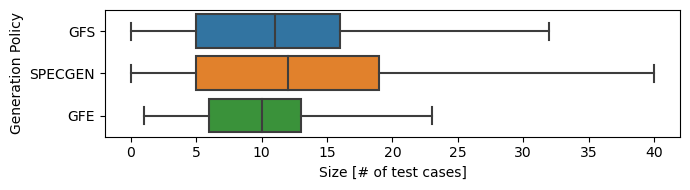

In [706]:
plt.figure(figsize=(7, 2))
sns.boxplot(y='Generator', x='Size', data=df, showfliers=False)
plt.ylabel('Generation Policy')
plt.xlabel('Size [# of test cases]')
plt.tight_layout()
plt.savefig('Size.pdf')
plt.show()

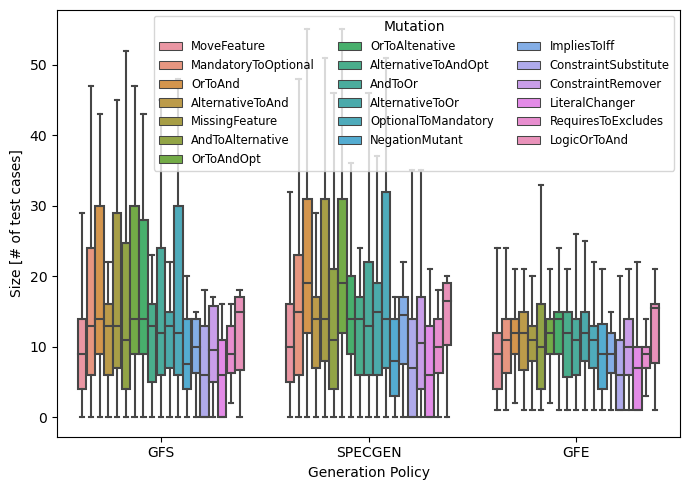

In [707]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Generator', y='Size', hue='Mutation', data=df, showfliers=False)
plt.xlabel('Generation Policy')
plt.ylabel('Size [# of test cases]')
plt.legend(title='Mutation', loc='upper right', ncol=3, fontsize='small')
plt.tight_layout()
plt.savefig('SizePerMutation.pdf')
plt.show()

In [708]:
printWilcoxonTestResults(df, 'Size')

GFS vs SPECGEN: p-value = 1.8553544222735774e-46
GFS vs GFE: p-value = 2.561095087342679e-111
SPECGEN vs GFE: p-value = 0.0

Average Size
Generator
GFE         9.445820
GFS        12.653541
SPECGEN    14.286258
Name: Size, dtype: float64

Median Size
Generator
GFE        10.0
GFS        11.0
SPECGEN    12.0
Name: Size, dtype: float64

StdDev Size
Generator
GFE         5.473388
GFS        10.238298
SPECGEN    12.428184
Name: Size, dtype: float64


In [709]:
printWilcoxonTestResultsByMutation(df, 'Size')

Mutation: MoveFeature
  GFS vs GFE: p-value = 2.917783156645692e-32
  GFS vs SPECGEN: p-value = 3.9199386473917296e-28
  GFE vs SPECGEN: p-value = 6.015728158668218e-128

Mutation: MandatoryToOptional
  SPECGEN vs GFE: p-value = 2.809080556352676e-62
  SPECGEN vs GFS: p-value = 0.0003377356366313456
  GFE vs GFS: p-value = 7.347573448509414e-28

Mutation: OrToAnd
  GFE vs SPECGEN: p-value = 1.8255616429911062e-40
  GFE vs GFS: p-value = 5.579252709656915e-17
  SPECGEN vs GFS: p-value = 5.36157063726881e-05

Mutation: AlternativeToAnd
  GFS vs SPECGEN: p-value = 0.005413470270884561
  GFS vs GFE: p-value = 0.9906004920622793
  SPECGEN vs GFE: p-value = 0.002192346072735886

Mutation: MissingFeature
  SPECGEN vs GFE: p-value = 1.2362155278816369e-68
  SPECGEN vs GFS: p-value = 0.0047565675663466655
  GFE vs GFS: p-value = 2.409889683298239e-59

Mutation: AndToAlternative
  GFE vs SPECGEN: p-value = 4.4357642243475975e-06
  GFE vs GFS: p-value = 0.0044771856469539685
  SPECGEN vs GFS: p-v

## Dissimilarity

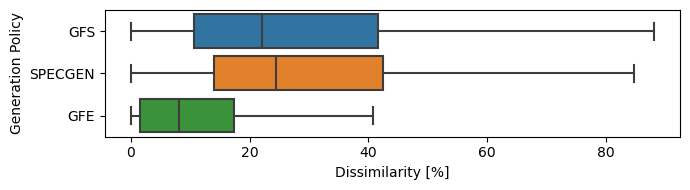

In [710]:
plt.figure(figsize=(7, 2))
sns.boxplot(y='Generator', x='Dissimilarity', data=df, showfliers=False)
plt.ylabel('Generation Policy')
plt.xlabel('Dissimilarity [%]')
plt.tight_layout()
plt.savefig('Dissimilarity.pdf')
plt.show()

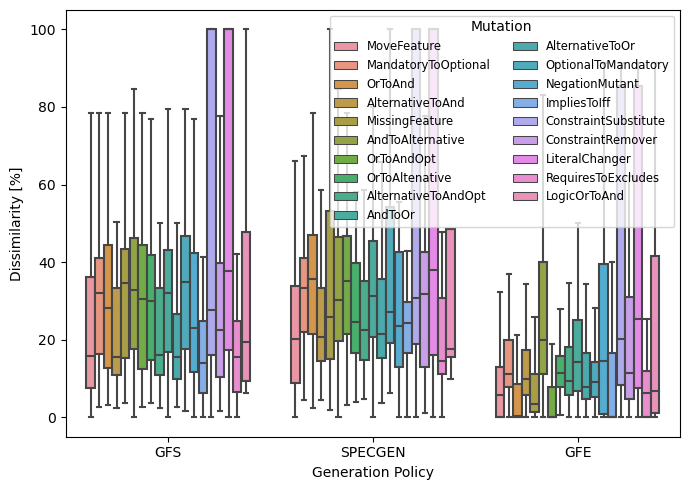

In [711]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Generator', y='Dissimilarity', hue='Mutation', data=df, showfliers=False)
plt.xlabel('Generation Policy')
plt.ylabel('Dissimilarity [%]')

# Set the legend to be placed below the plot with 3 columns
plt.legend(title='Mutation', loc='upper right', ncol=2, fontsize='small')
plt.tight_layout()
plt.savefig('DissimilarityPerMutation.pdf')
plt.show()

In [712]:
printWilcoxonTestResults(df, 'Dissimilarity')

GFS vs SPECGEN: p-value = 1.0970673381917178e-47
GFS vs GFE: p-value = 0.0
SPECGEN vs GFE: p-value = 0.0

Average Dissimilarity
Generator
GFE        17.722006
GFS        30.031373
SPECGEN    31.997053
Name: Dissimilarity, dtype: float64

Median Dissimilarity
Generator
GFE         8.045978
GFS        22.010870
SPECGEN    24.342104
Name: Dissimilarity, dtype: float64

StdDev Dissimilarity
Generator
GFE        25.968943
GFS        27.370087
SPECGEN    26.845132
Name: Dissimilarity, dtype: float64


In [713]:
printWilcoxonTestResultsByMutation(df, 'Dissimilarity')

Mutation: MoveFeature
  GFS vs GFE: p-value = 0.0
  GFS vs SPECGEN: p-value = 7.59396136251756e-34
  GFE vs SPECGEN: p-value = 0.0

Mutation: MandatoryToOptional
  SPECGEN vs GFE: p-value = 0.0
  SPECGEN vs GFS: p-value = 7.503351160000071e-11
  GFE vs GFS: p-value = 3.152649648416393e-268

Mutation: OrToAnd
  GFE vs SPECGEN: p-value = 2.9721191291435613e-109
  GFE vs GFS: p-value = 1.274744081807966e-94
  SPECGEN vs GFS: p-value = 1.1423240139648057e-07

Mutation: AlternativeToAnd
  GFS vs SPECGEN: p-value = 5.026132243258339e-08
  GFS vs GFE: p-value = 1.2321826084812445e-21
  SPECGEN vs GFE: p-value = 1.0370889002055305e-40

Mutation: MissingFeature
  SPECGEN vs GFE: p-value = 0.0
  SPECGEN vs GFS: p-value = 0.3927212801983877
  GFE vs GFS: p-value = 0.0

Mutation: AndToAlternative
  GFE vs SPECGEN: p-value = 1.355060773388245e-33
  GFE vs GFS: p-value = 2.3099354062274446e-30
  SPECGEN vs GFS: p-value = 0.7633061759120744

Mutation: OrToAndOpt
  GFE vs SPECGEN: p-value = 3.54590610

## Mutation Score

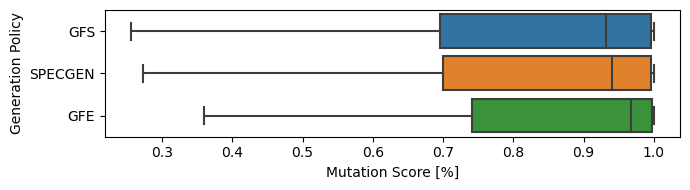

In [714]:
plt.figure(figsize=(7, 2))
sns.boxplot(y='Generator', x='MutationScore', data=df, showfliers=False)
plt.ylabel('Generation Policy')
plt.xlabel('Mutation Score [%]')
plt.tight_layout()
plt.savefig('MutationScore.pdf')
plt.show()

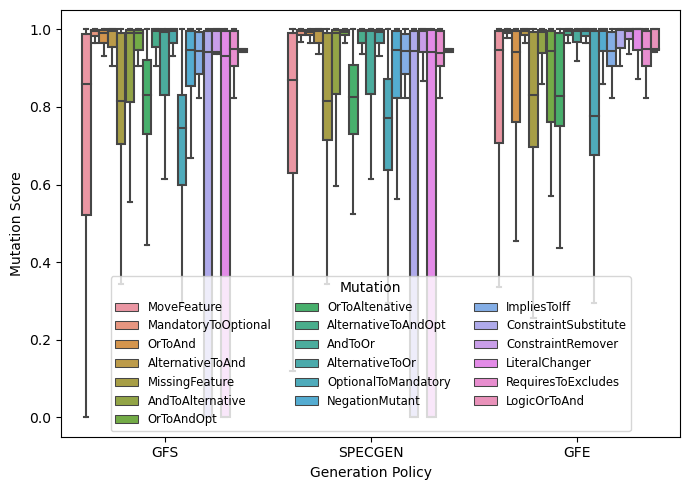

In [715]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Generator', y='MutationScore', hue='Mutation', data=df, showfliers=False)
plt.xlabel('Generation Policy')
plt.ylabel('Mutation Score')
plt.legend(title='Mutation', loc='lower center', ncol=3, fontsize='small')
plt.tight_layout()
plt.savefig('MutationScorePerMutation.pdf')
plt.show()

In [716]:
printWilcoxonTestResults(df, 'MutationScore')

GFS vs SPECGEN: p-value = 5.466896275624351e-08
GFS vs GFE: p-value = 6.910346335811759e-210
SPECGEN vs GFE: p-value = 3.6857399338437493e-143

Average MutationScore
Generator
GFE        0.848472
GFS        0.764262
SPECGEN    0.777123
Name: MutationScore, dtype: float64

Median MutationScore
Generator
GFE        0.967391
GFS        0.931677
SPECGEN    0.941080
Name: MutationScore, dtype: float64

StdDev MutationScore
Generator
GFE        0.215782
GFS        0.318831
SPECGEN    0.309624
Name: MutationScore, dtype: float64


In [717]:
printWilcoxonTestResultsByMutation(df, 'MutationScore')

Mutation: MoveFeature
  GFS vs GFE: p-value = 7.56817198604902e-152
  GFS vs SPECGEN: p-value = 1.810600808313771e-05
  GFE vs SPECGEN: p-value = 3.505662924875859e-108

Mutation: MandatoryToOptional
  SPECGEN vs GFE: p-value = 1.1492831866404414e-12
  SPECGEN vs GFS: p-value = 0.422415211931247
  GFE vs GFS: p-value = 2.7208417046350248e-15

Mutation: OrToAnd
  GFE vs SPECGEN: p-value = 1.0259170711238036e-21
  GFE vs GFS: p-value = 1.5698736175554756e-13
  SPECGEN vs GFS: p-value = 0.00665451878659935

Mutation: AlternativeToAnd
  GFS vs SPECGEN: p-value = 0.9829108970146029
  GFS vs GFE: p-value = 0.0003991146945549969
  SPECGEN vs GFE: p-value = 0.0003897312718731904

Mutation: MissingFeature
  SPECGEN vs GFE: p-value = 0.0002639279103030044
  SPECGEN vs GFS: p-value = 0.17276615853420563
  GFE vs GFS: p-value = 7.542112161292986e-07

Mutation: AndToAlternative
  GFE vs SPECGEN: p-value = 7.566906279079184e-13
  GFE vs GFS: p-value = 1.2717987309182114e-17
  SPECGEN vs GFS: p-value

## Specificity

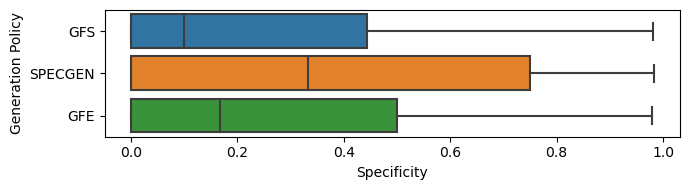

In [718]:
plt.figure(figsize=(7, 2))
sns.boxplot(y='Generator', x='Specificity', data=df, showfliers=False)
plt.ylabel('Generation Policy')
plt.xlabel('Specificity')
plt.tight_layout()
plt.savefig('Specificity.pdf')
plt.show()

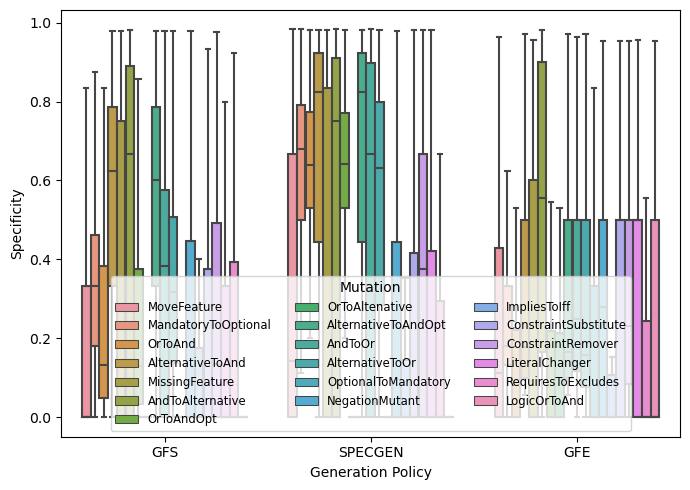

In [ ]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Generator', y='Specificity', hue='Mutation', data=df, showfliers=False)
plt.xlabel('Generation Policy')
plt.ylabel('Specificity')
plt.legend(title='Mutation', loc='lower center', ncol=3, fontsize='x-small')
plt.tight_layout()
plt.savefig('SpecificityPerMutation.pdf')
plt.show()

In [720]:
printWilcoxonTestResults(df, 'Specificity')

GFS vs SPECGEN: p-value = 2.9108469168239473e-217
GFS vs GFE: p-value = 2.381420762394573e-24
SPECGEN vs GFE: p-value = 3.920043817567216e-150

Average Specificity
Generator
GFE        0.268035
GFS        0.260504
SPECGEN    0.381748
Name: Specificity, dtype: float64

Median Specificity
Generator
GFE        0.166667
GFS        0.100000
SPECGEN    0.333333
Name: Specificity, dtype: float64

StdDev Specificity
Generator
GFE        0.299892
GFS        0.315909
SPECGEN    0.373295
Name: Specificity, dtype: float64


In [721]:
printWilcoxonTestResultsByMutation(df, 'Specificity')

Mutation: MoveFeature
  GFS vs GFE: p-value = 3.842807212118949e-60
  GFS vs SPECGEN: p-value = 4.634131625616212e-107
  GFE vs SPECGEN: p-value = 9.42702754366083e-31

Mutation: MandatoryToOptional
  SPECGEN vs GFE: p-value = 0.0
  SPECGEN vs GFS: p-value = 1.9048674764594034e-300
  GFE vs GFS: p-value = 9.105938227137875e-69

Mutation: OrToAnd
  GFE vs SPECGEN: p-value = 1.0943335526845289e-70
  GFE vs GFS: p-value = 5.638363540734943e-17
  SPECGEN vs GFS: p-value = 1.6874459103956926e-56

Mutation: AlternativeToAnd
  GFS vs SPECGEN: p-value = 3.3060687983992853e-13
  GFS vs GFE: p-value = 3.582421711224343e-23
  SPECGEN vs GFE: p-value = 2.7091730980035144e-39

Mutation: MissingFeature
  SPECGEN vs GFE: p-value = 0.7422137763685184
  SPECGEN vs GFS: p-value = 0.33797192657293307
  GFE vs GFS: p-value = 0.2504519502250867

Mutation: AndToAlternative
  GFE vs SPECGEN: p-value = 0.001501146676709903
  GFE vs GFS: p-value = 0.33785662141320305
  SPECGEN vs GFS: p-value = 0.0002363328304